<a href="https://colab.research.google.com/github/SaifAlmaliki/Diabetes-prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

**Read CSV file**

In [33]:
data = pd.read_csv('diabetes.csv')

**Preprocessing**

Remove 0's etrires from our dataset in these filed

Buid a function to calculate the 0's in the fields

In [34]:
zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

def check_zero_entries(data, fields):
    # list number of 0 entries in each given field
    for f in fields:
      print('Field %s has %d zeros' %(f, len(data.loc[data[f] == 0, f])))

In [35]:
# check zero entries
check_zero_entries(data, zero_fields)

Field Glucose has 5 zeros
Field BloodPressure has 35 zeros
Field SkinThickness has 227 zeros
Field Insulin has 374 zeros
Field BMI has 11 zeros
Field Age has 0 zeros


Split data to train/test

In [36]:
from sklearn.model_selection import train_test_split

# collect column names for features
features = list(data.columns.values)

# exclude the 'Outcome' column which is the label
features.remove('Outcome')

print('Features:', features)

x = data[features]
y = data['Outcome']

Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


**Fix zero fields with mean**

fix the 0-entry for a field in the dataset with its avg value

In [37]:
def impute_zero_fields(data, field):
    
    non_zero_values = data.loc[data[field] != 0, field]
    
    # calculate mean()
    avg = np.sum(non_zero_values) / len(non_zero_values)

    # replace the zeros with mean value
    data.loc[data[field] == 0, field ] = avg 

    print('Zeros in Field %s : fixed with value: %.2f' %(field, avg))

Apply our function for the train set only (x_train)

In [38]:
# split our data to train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

for f in zero_fields:
    impute_zero_fields(x_train, f)

Zeros in Field Glucose : fixed with value: 122.00
Zeros in Field BloodPressure : fixed with value: 72.85
Zeros in Field SkinThickness : fixed with value: 29.46
Zeros in Field Insulin : fixed with value: 158.46
Zeros in Field BMI : fixed with value: 32.66
Zeros in Field Age : fixed with value: 33.58


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Double check for the **Train** data after applying the imputation

In [39]:
check_zero_entries(x_train, zero_fields)

Field Glucose has 0 zeros
Field BloodPressure has 0 zeros
Field SkinThickness has 0 zeros
Field Insulin has 0 zeros
Field BMI has 0 zeros
Field Age has 0 zeros


Check for the **Test** data for zeros

In [40]:
check_zero_entries(x_test, zero_fields)

Field Glucose has 1 zeros
Field BloodPressure has 10 zeros
Field SkinThickness has 64 zeros
Field Insulin has 104 zeros
Field BMI has 3 zeros
Field Age has 0 zeros


In [41]:
# Remove field header name before traiing

x_train = x_train.values
y_train = y_train.values
x_test  = x_test.values
y_test  = y_test

**Apply Deep Learning**

In [42]:
epochs = 1000
batch_size = 16

model = Sequential()

model.add(Dense(12, 
                input_dim=8, 
                kernel_initializer='random_uniform', 
                activation='relu'))

model.add(Dense(8, 
                kernel_initializer='random_uniform',
                activation='relu'))

model.add(Dense(1, 
                kernel_initializer='random_uniform',
                activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Create Checkpoint to store the best model**

In [43]:
ckpt_model = 'pima-weights.best-hdf5'
checkpoint = ModelCheckpoint(ckpt_model,
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

callback_list=[checkpoint]

print('starting training ...')

# train the model and store the results for plotting
his = model.fit(x_train, 
                y_train, 
                validation_data=(x_test, y_test),
                epochs = epochs,
                batch_size=batch_size,
                callbacks= callback_list,
                verbose = 0)

starting training ...
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets
INFO:tensorflow:Assets written to: pima-weights.best-hdf5/assets


**Plot accuracy**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'i' instances.
A proxy artist ma

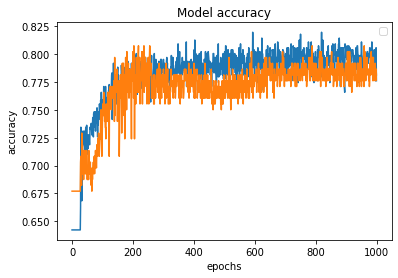

In [44]:

plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend("Train", "Test")
plt.show()

**Plot loss**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

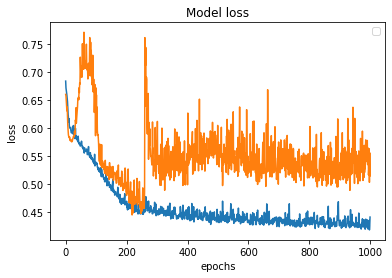

In [45]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend("Train", "Test")
plt.show()

In [46]:
score = model.evaluate(x_train, y_train)
print("Accuracy: " , score[1] *100)

18/18 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8056
Accuracy:  80.55555820465088


**Apply Random Forest Classifier**

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


classifier =RandomForestClassifier(n_estimators = 6,
                                   criterion = 'entropy',
                                   random_state = 0)
classifier.fit(x_train, y_train)

# Prediction
y_pred = classifier.predict(x_test)

# calculate CM
cm =confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: ", classifier.score(x_test, y_test)*100)

[[111  19]
 [ 33  29]]
Accuracy:  72.91666666666666


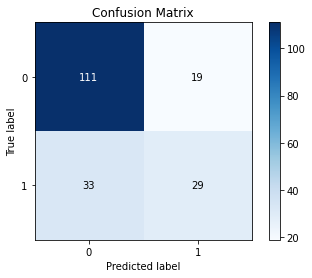

In [61]:
# Draw Confusion matrix in stylish design

!pip install scikit-plot

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

In [71]:
# predict our classifier with new unseen data
print("The new prediction: ", classifier.predict(np.array([[6,142,72,45,0,38.6,0.627,50]])))

# one more prediction
print("The new prediction: ", classifier.predict(np.array([[1,109,30,38,83,53.5,0.193,33]])))

The new prediction:  [1]
The new prediction:  [0]
